<a href="https://colab.research.google.com/github/DheerajDinesh/Premier-League-Score-Prediction/blob/main/Project_Premier_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Datasets :
# df - Complete dataset
# prem_team_list - list of premier league teams

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project Premier League/Data.csv')
df_prem=pd.read_csv('/content/drive/MyDrive/Project Premier League/premier-league-matches.csv')
df

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date
0,2,West Ham United,2,Arsenal,NaN,David Coote,"London Stadium, London",2022/23,"Sun 16 Apr 2023, 14:00"
1,2,Tottenham Hotspur,3,Bournemouth,"Att: 61,369",Andy Madley,"Tottenham Hotspur Stadium, London",2022/23,"Sat 15 Apr 2023, 15:15"
2,0,Southampton,2,Crystal Palace,"Att: 30,309",Michael Oliver,"St. Mary's Stadium, Southampton",2022/23,"Sat 15 Apr 2023, 15:00"
3,0,Nottingham Forest,2,Manchester United,"Att: 29,435",Simon Hooper,"The City Ground, Nottingham",2022/23,"Sun 16 Apr 2023, 16:30"
4,3,Manchester City,1,Leicester City,"Att: 53,329",Darren England,"Etihad Stadium, Manchester",2022/23,"Sat 15 Apr 2023, 17:30"
...,...,...,...,...,...,...,...,...,...
33225,1,Burnley,3,Watford,"Att: 18,822",Paul Tierney,"Turf Moor, Burnley",2018/19,"Sun 19 Aug 2018, 13:30"
33226,3,Chelsea,2,Arsenal,"Att: 40,491",Martin Atkinson,"Stamford Bridge, London",2018/19,"Sat 18 Aug 2018, 17:30"
33227,0,Cardiff City,0,Newcastle United,"Att: 30,720",Craig Pawson,"Cardiff City Stadium, Cardiff",2018/19,"Sat 18 Aug 2018, 12:30"
33228,3,Brighton & Hove Albion,2,Manchester United,"Att: 30,592",Kevin Friend,"Amex Stadium, Falmer",2018/19,"Sun 19 Aug 2018, 16:00"


In [ ]:
df_prem

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


In [ ]:
df.head()

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date
0,2,West Ham United,2,Arsenal,NaN,David Coote,"London Stadium, London",2022/23,"Sun 16 Apr 2023, 14:00"
1,2,Tottenham Hotspur,3,Bournemouth,"Att: 61,369",Andy Madley,"Tottenham Hotspur Stadium, London",2022/23,"Sat 15 Apr 2023, 15:15"
2,0,Southampton,2,Crystal Palace,"Att: 30,309",Michael Oliver,"St. Mary's Stadium, Southampton",2022/23,"Sat 15 Apr 2023, 15:00"
3,0,Nottingham Forest,2,Manchester United,"Att: 29,435",Simon Hooper,"The City Ground, Nottingham",2022/23,"Sun 16 Apr 2023, 16:30"
4,3,Manchester City,1,Leicester City,"Att: 53,329",Darren England,"Etihad Stadium, Manchester",2022/23,"Sat 15 Apr 2023, 17:30"


In [ ]:
df_prem.head()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A


In [ ]:
df.tail()

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date
33225,1,Burnley,3,Watford,"Att: 18,822",Paul Tierney,"Turf Moor, Burnley",2018/19,"Sun 19 Aug 2018, 13:30"
33226,3,Chelsea,2,Arsenal,"Att: 40,491",Martin Atkinson,"Stamford Bridge, London",2018/19,"Sat 18 Aug 2018, 17:30"
33227,0,Cardiff City,0,Newcastle United,"Att: 30,720",Craig Pawson,"Cardiff City Stadium, Cardiff",2018/19,"Sat 18 Aug 2018, 12:30"
33228,3,Brighton & Hove Albion,2,Manchester United,"Att: 30,592",Kevin Friend,"Amex Stadium, Falmer",2018/19,"Sun 19 Aug 2018, 16:00"
33229,2,Wolverhampton Wanderers,2,Everton,"Att: 31,231",Craig Pawson,"Molineux Stadium, Wolverhampton",2018/19,"Sat 11 Aug 2018, 17:30"


In [ ]:
df_prem.tail()

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A
12025,2023,38,2023-05-28,Brentford,1,0,Manchester City,H


In [ ]:
df['Season'].unique()

array(['2022/23', 'Friendly Season 2022/2023',
       'Spanish Supercopa Season 2022/2023',
       'Other Club Friendlies Season 2022/2023',
       'Internationals Women Season 2022/2023',
       'Club Friendlies Women Season 2022/2023',
       'Trofeo Joan Gamper Season 2022/2023',
       "Women's International Champions Cup Season 2022/2023",
       'Internationals Women Season 2021/2022',
       'UEFA Super Cup Season 2022/2023',
       'English Community Shield Season 2022/2023',
       'English Football League - League Two Season 2021/2022',
       'Hybrid Friendlies Season 2021/2022',
       'English Football League - Championship Season 2021/2022',
       '2021/22', 'Spanish Copa de la Reina Season 2021/2022',
       'English U16 Premier League Cup Season 2021/2022',
       'English Football League - League One Season 2021/2022',
       'Scottish Premiership Play-offs Season 2021/2022',
       'Scottish League Two Play-offs Season 2021/2022',
       'Scottish League One Play-off

In [ ]:
df1=df.loc[(df['Season']<='2022/2023')&(df['Season']>'2013/2014')]
df2=df.loc[(df['Season']<='2022/23')&(df['Season']>'2013/14')]
df1['Season'].unique()

array(['2021/22', '2020/21', '2019/20', '2016/17', '2015/16', '2017/18',
       '2018/19', '2014/15', '2014/2015', '2015/2016', '2017/2018',
       '2016/2017', '2018/2019'], dtype=object)

In [ ]:
df2['Season'].unique()

array(['2022/23', '2021/22', '2020/21', '2019/20', '2016/17', '2015/16',
       '2017/18', '2018/19', '2014/15', '2014/2015', '2015/2016',
       '2017/2018', '2016/2017', '2018/2019', '2013/2014'], dtype=object)

In [ ]:
df=pd.concat([df1,df2])
df

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date
375,2,Wolverhampton Wanderers,0,Stoke City,"Att: 4,936",Thomas Kirk,"Molineux Stadium, Wolverhampton",2021/22,"Mon 23 May 2022, 19:00"
378,2,Bristol City,3,Coventry City,NaN,NaN,"Ashton Gate, Bristol",2021/22,"Tue 17 May 2022, 19:00"
386,2,Sheffield United,1,Charlton Athletic,NaN,NaN,"Sheffield United Football Academy, Sheffield",2021/22,"Sat 21 May 2022, 12:00"
387,3,Charlton Athletic,2,Barnsley,NaN,NaN,"The Valley, London",2021/22,"Sat 14 May 2022, 14:00"
393,1,Southampton U18,2,Manchester City U18,"Att: 13,035",Lewis Sandoe,"St. Mary's Stadium, Southampton",2021/22,"Thu 19 May 2022, 19:00"
...,...,...,...,...,...,...,...,...,...
33225,1,Burnley,3,Watford,"Att: 18,822",Paul Tierney,"Turf Moor, Burnley",2018/19,"Sun 19 Aug 2018, 13:30"
33226,3,Chelsea,2,Arsenal,"Att: 40,491",Martin Atkinson,"Stamford Bridge, London",2018/19,"Sat 18 Aug 2018, 17:30"
33227,0,Cardiff City,0,Newcastle United,"Att: 30,720",Craig Pawson,"Cardiff City Stadium, Cardiff",2018/19,"Sat 18 Aug 2018, 12:30"
33228,3,Brighton & Hove Albion,2,Manchester United,"Att: 30,592",Kevin Friend,"Amex Stadium, Falmer",2018/19,"Sun 19 Aug 2018, 16:00"


In [ ]:
# New Column for Result based on Goals
conditions=[df['Home_team_score']>df['Away_team_score'],
            df['Home_team_score']<df['Away_team_score']]

choices=['H','A']

df['Result']=np.select(conditions,choices,default='D')
df.reset_index(drop=True,inplace=True)
df

,Home_team_score,Home_team_name,Away_team_score,Away_team_name,attendance,referee,stadium,Season,Date,Result
0,2,Wolverhampton Wanderers,0,Stoke City,"Att: 4,936",Thomas Kirk,"Molineux Stadium, Wolverhampton",2021/22,"Mon 23 May 2022, 19:00",H
1,2,Bristol City,3,Coventry City,NaN,NaN,"Ashton Gate, Bristol",2021/22,"Tue 17 May 2022, 19:00",A
2,2,Sheffield United,1,Charlton Athletic,NaN,NaN,"Sheffield United Football Academy, Sheffield",2021/22,"Sat 21 May 2022, 12:00",H
3,3,Charlton Athletic,2,Barnsley,NaN,NaN,"The Valley, London",2021/22,"Sat 14 May 2022, 14:00",H
4,1,Southampton U18,2,Manchester City U18,"Att: 13,035",Lewis Sandoe,"St. Mary's Stadium, Southampton",2021/22,"Thu 19 May 2022, 19:00",A
...,...,...,...,...,...,...,...,...,...,...
28464,1,Burnley,3,Watford,"Att: 18,822",Paul Tierney,"Turf Moor, Burnley",2018/19,"Sun 19 Aug 2018, 13:30",A
28465,3,Chelsea,2,Arsenal,"Att: 40,491",Martin Atkinson,"Stamford Bridge, London",2018/19,"Sat 18 Aug 2018, 17:30",H
28466,0,Cardiff City,0,Newcastle United,"Att: 30,720",Craig Pawson,"Cardiff City Stadium, Cardiff",2018/19,"Sat 18 Aug 2018, 12:30",D
28467,3,Brighton & Hove Albion,2,Manchester United,"Att: 30,592",Kevin Friend,"Amex Stadium, Falmer",2018/19,"Sun 19 Aug 2018, 16:00",H


In [ ]:
#Converting date from string to datetime format and dividing them into 3 columns

df['Date']=pd.to_datetime(df['Date'], format='mixed')
df['Day']=pd.DatetimeIndex(df['Date']).day
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year

df_prem['Date']=pd.to_datetime(df_prem['Date'])
df_prem['Day']=pd.DatetimeIndex(df_prem['Date']).day
df_prem['Month']=pd.DatetimeIndex(df_prem['Date']).month
df_prem['Year']=pd.DatetimeIndex(df_prem['Date']).year

In [ ]:
#Renaming Columns
df.rename(columns={'Home_team_name':'Home', 'Away_team_name':'Away', 'Home_team_score':'HomeGoals', 'Away_team_score':'AwayGoals'},inplace=True)
df_prem.rename(columns={'FTR':'Result'},inplace=True)

In [ ]:
# List of all premier league teams
prem_team_list=list(df_prem['Home'].unique())
prem_team_list.sort()
prem_team_list

['Arsenal',
 'Aston Villa',
 'Barnsley',
 'Birmingham City',
 'Blackburn',
 'Blackpool',
 'Bolton',
 'Bournemouth',
 'Bradford City',
 'Brentford',
 'Brighton',
 'Burnley',
 'Cardiff City',
 'Charlton Ath',
 'Chelsea',
 'Coventry City',
 'Crystal Palace',
 'Derby County',
 'Everton',
 'Fulham',
 'Huddersfield',
 'Hull City',
 'Ipswich Town',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester Utd',
 'Middlesbrough',
 'Newcastle Utd',
 'Norwich City',
 "Nott'ham Forest",
 'Oldham Athletic',
 'Portsmouth',
 'QPR',
 'Reading',
 'Sheffield Utd',
 'Sheffield Weds',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Swindon Town',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wigan Athletic',
 'Wimbledon',
 'Wolves']

In [ ]:
# Dropping unwanted columns
df.drop(['attendance', 'referee', 'Season', 'Date', 'stadium'],axis=1,inplace=True)
df_prem.drop(['Season_End_Year', 'Wk','Date'],axis=1,inplace=True)
df_prem

,Home,HomeGoals,AwayGoals,Away,Result,Day,Month,Year
0,Coventry City,2,1,Middlesbrough,H,15,8,1992
1,Leeds United,2,1,Wimbledon,H,15,8,1992
2,Sheffield Utd,2,1,Manchester Utd,H,15,8,1992
3,Crystal Palace,3,3,Blackburn,D,15,8,1992
4,Arsenal,2,4,Norwich City,A,15,8,1992
...,...,...,...,...,...,...,...,...
12021,Everton,1,0,Bournemouth,H,28,5,2023
12022,Leicester City,2,1,West Ham,H,28,5,2023
12023,Aston Villa,2,1,Brighton,H,28,5,2023
12024,Leeds United,1,4,Tottenham,A,28,5,2023


In [ ]:
df.isna().sum()

HomeGoals    0
Home         0
AwayGoals    0
Away         0
Result       0
Day          0
Month        0
Year         0
dtype: int64

In [ ]:
df.dtypes

HomeGoals    object
Home         object
AwayGoals    object
Away         object
Result       object
Day           int32
Month         int32
Year          int32
dtype: object

In [ ]:
df_prem.isna().sum()

Home         0
HomeGoals    0
AwayGoals    0
Away         0
Result       0
Day          0
Month        0
Year         0
dtype: int64

In [ ]:
df_prem.dtypes

Home         object
HomeGoals     int64
AwayGoals     int64
Away         object
Result       object
Day           int32
Month         int32
Year          int32
dtype: object

Both Dataset Cleaned

In [ ]:
#Combining both Datasets
df_all=pd.concat([df,df_prem])
df_all.reset_index(drop=True,inplace=True)
df_all.drop_duplicates(keep='first')
df=df_all
df

,HomeGoals,Home,AwayGoals,Away,Result,Day,Month,Year
0,2,Wolverhampton Wanderers,0,Stoke City,H,23,5,2022
1,2,Bristol City,3,Coventry City,A,17,5,2022
2,2,Sheffield United,1,Charlton Athletic,H,21,5,2022
3,3,Charlton Athletic,2,Barnsley,H,14,5,2022
4,1,Southampton U18,2,Manchester City U18,A,19,5,2022
...,...,...,...,...,...,...,...,...
40490,1,Everton,0,Bournemouth,H,28,5,2023
40491,2,Leicester City,1,West Ham,H,28,5,2023
40492,2,Aston Villa,1,Brighton,H,28,5,2023
40493,1,Leeds United,4,Tottenham,A,28,5,2023


Combined Both Dataset

In [ ]:
df.dtypes

HomeGoals    object
Home         object
AwayGoals    object
Away         object
Result       object
Day           int32
Month         int32
Year          int32
dtype: object

In [ ]:
df.HomeGoals.unique()

array(['2', '3', '1', '5', '0', '7', '4', '6', '9', '8', '13', '10', '11',
       'A', 2, 3, 1, 0, 4, 5, 7, 6, 9, 8], dtype=object)

In [ ]:
df.loc[df['HomeGoals']=='A']

,HomeGoals,Home,AwayGoals,Away,Result,Day,Month,Year
8223,A,Borussia Dortmund,A,Udinese,D,27,7,2019
22581,A,Borussia Dortmund,A,Udinese,D,27,7,2019


In [ ]:
df.drop([8223, 22581],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)
df_all=df

In [ ]:
df.dtypes

HomeGoals    object
Home         object
AwayGoals    object
Away         object
Result       object
Day           int32
Month         int32
Year          int32
dtype: object

In [ ]:
df['HomeGoals']=df['HomeGoals'].astype(int)
df['AwayGoals']=df['AwayGoals'].astype(int)

In [ ]:
df.corr(numeric_only=True)

,HomeGoals,AwayGoals,Day,Month,Year
HomeGoals,1.000000,-0.122565,-0.028849,0.009248,0.054824
AwayGoals,-0.122565,1.000000,-0.002712,0.017157,0.101670
Day,-0.028849,-0.002712,1.000000,0.041336,-0.043121
Month,0.009248,0.017157,0.041336,1.000000,-0.038558
Year,0.054824,0.101670,-0.043121,-0.038558,1.000000


<Axes: >

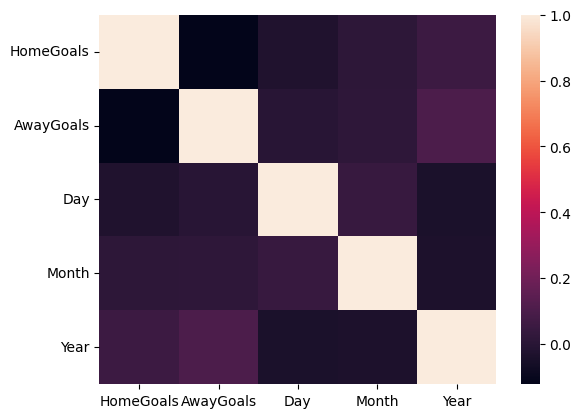

In [ ]:
sns.heatmap(df.corr(numeric_only=True))

In [ ]:
df.drop(['Day'],axis=1,inplace=True)
df

,HomeGoals,Home,AwayGoals,Away,Result,Month,Year
0,2,Wolverhampton Wanderers,0,Stoke City,H,5,2022
1,2,Bristol City,3,Coventry City,A,5,2022
2,2,Sheffield United,1,Charlton Athletic,H,5,2022
3,3,Charlton Athletic,2,Barnsley,H,5,2022
4,1,Southampton U18,2,Manchester City U18,A,5,2022
...,...,...,...,...,...,...,...
40488,1,Everton,0,Bournemouth,H,5,2023
40489,2,Leicester City,1,West Ham,H,5,2023
40490,2,Aston Villa,1,Brighton,H,5,2023
40491,1,Leeds United,4,Tottenham,A,5,2023


Removing Outliers

<Axes: xlabel='Year'>

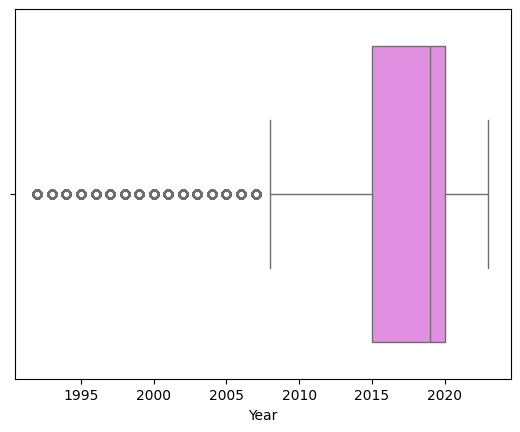

In [ ]:
sns.boxplot(data=df,x='Year',color='violet')

<Axes: xlabel='Year'>

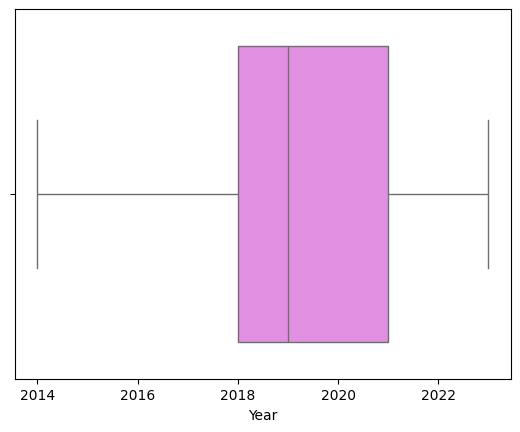

In [ ]:
df=df.loc[df['Year']>=2014]
sns.boxplot(data=df,x='Year',color='violet')

<Axes: xlabel='Month'>

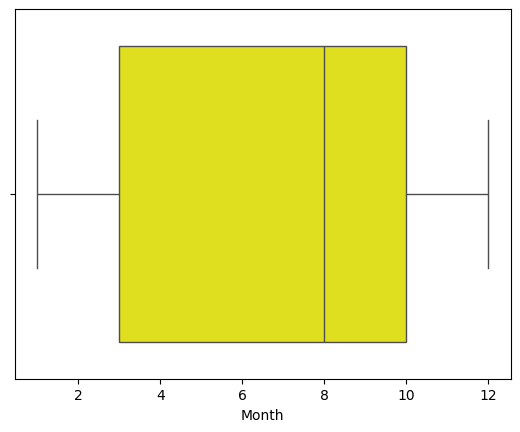

In [ ]:
sns.boxplot(data=df,x='Month',color='yellow')

<Axes: xlabel='HomeGoals'>

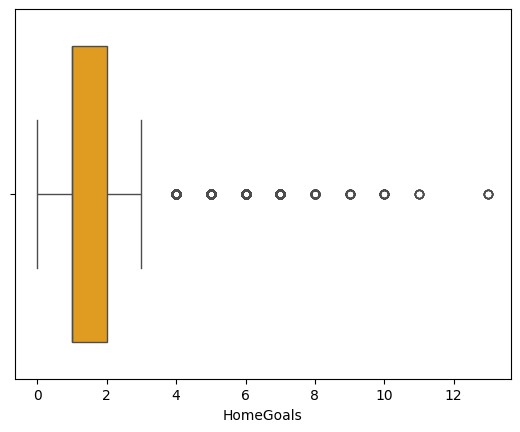

In [ ]:
sns.boxplot(data=df,x='HomeGoals',color='orange')

<Axes: xlabel='HomeGoals'>

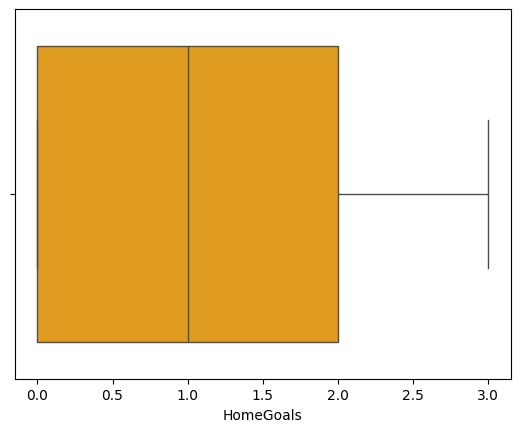

In [ ]:
df=df.loc[df['HomeGoals']<=3]
sns.boxplot(data=df,x='HomeGoals',color='orange')

<Axes: xlabel='AwayGoals'>

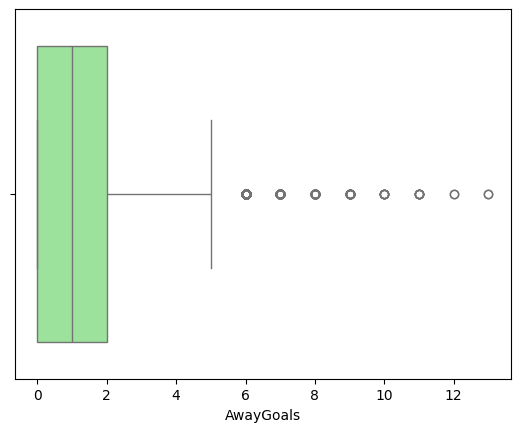

In [ ]:
sns.boxplot(data=df,x='AwayGoals',color='lightgreen')

<Axes: xlabel='AwayGoals'>

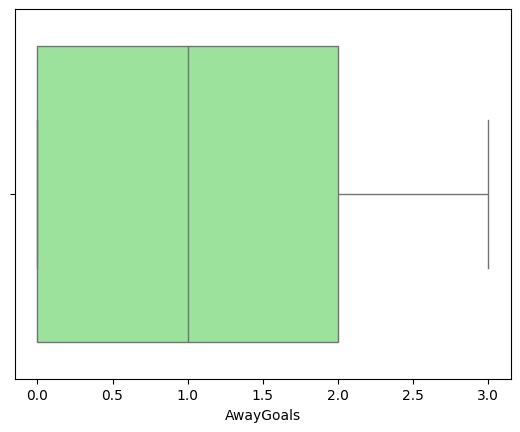

In [ ]:
df=df.loc[df['AwayGoals']<=3]
sns.boxplot(data=df,x='AwayGoals',color='lightgreen')

<ipython-input-39-5661dac11b4d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='HomeGoals',y='AwayGoals',palette='husl')


<Axes: xlabel='HomeGoals', ylabel='AwayGoals'>

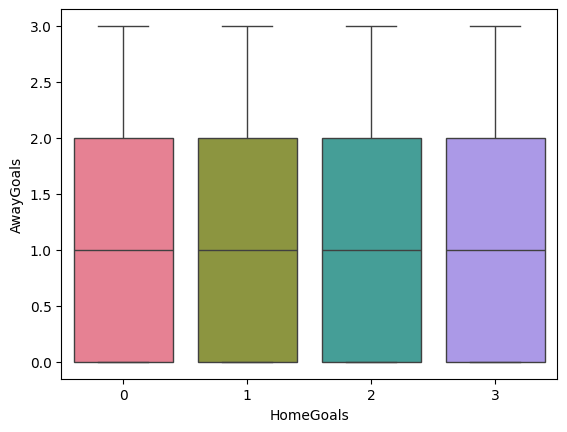

In [ ]:
sns.boxplot(data=df,x='HomeGoals',y='AwayGoals',palette='husl')

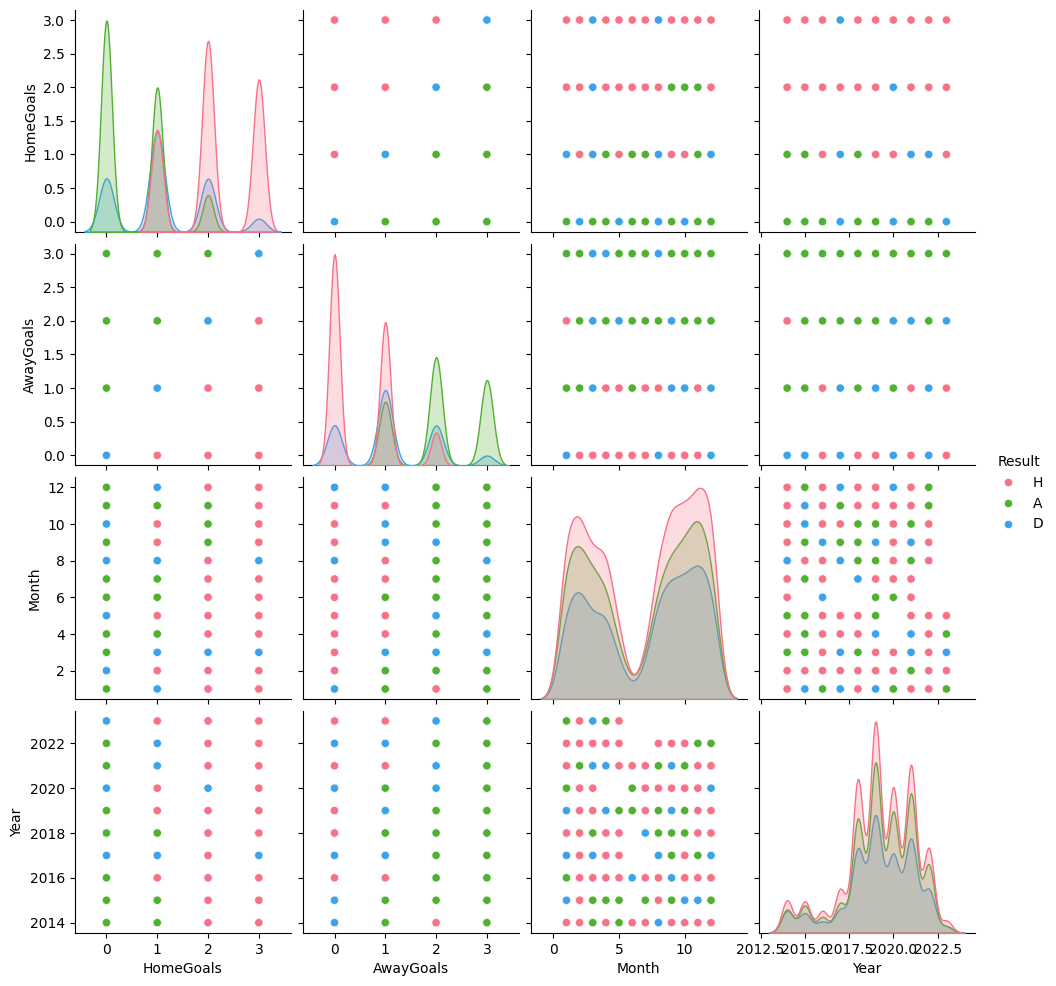

In [ ]:
sns.pairplot(df,hue='Result',palette='husl')

<ipython-input-41-53e01ecd3d59>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Result'],data=df,palette='Spectral',order=['H','D','A'])


<Axes: xlabel='Result', ylabel='count'>

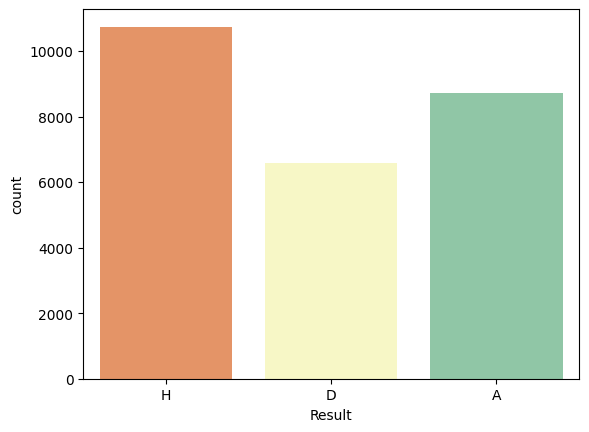

In [ ]:
sns.countplot(x=df['Result'],data=df,palette='Spectral',order=['H','D','A'])

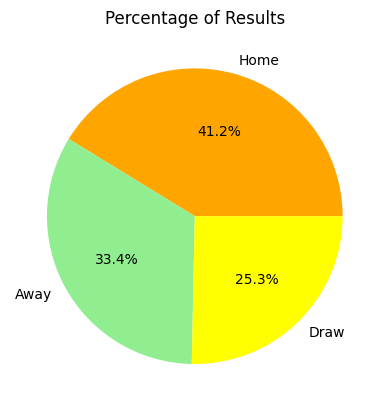

In [ ]:
plt.pie(x=df['Result'].value_counts(),labels=['Home', 'Away', 'Draw'],autopct='%1.1f%%',colors=['orange','lightgreen','yellow'])
plt.title('Percentage of Results')
plt.show()

In [ ]:
df.HomeGoals.unique()

array([2, 3, 1, 0])

<Axes: xlabel='HomeGoals', ylabel='count'>

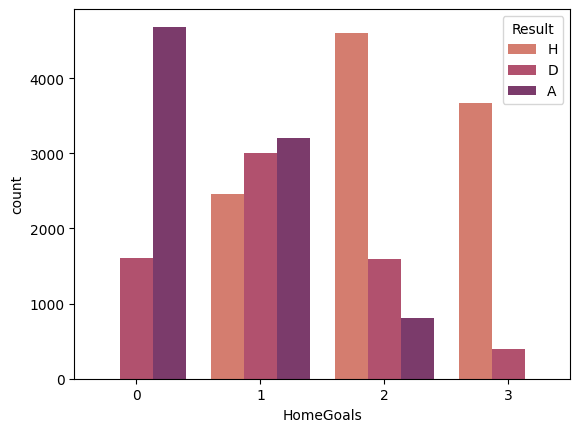

In [ ]:
sns.countplot(x=df['HomeGoals'],data=df,palette='flare',hue=df['Result'],hue_order=['H','D','A'])

In [ ]:
df.AwayGoals.unique()

array([0, 3, 1, 2])

<Axes: xlabel='AwayGoals', ylabel='count'>

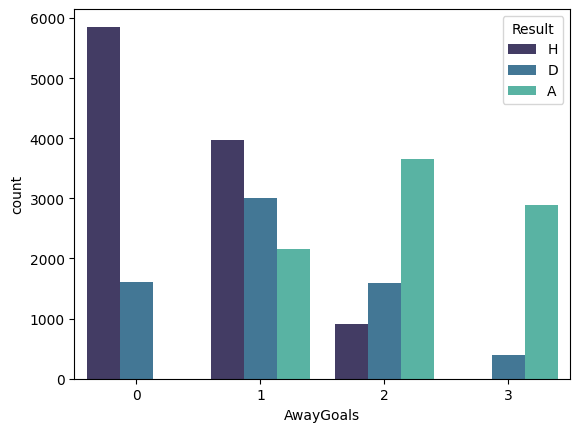

In [ ]:
sns.countplot(x=df['AwayGoals'],data=df,palette='mako',hue=df['Result'],hue_order=['H','D','A'])

In [ ]:
df['Result']=df['Result'].map({'H':1, 'A':-1, 'D':0})
df.dtypes

HomeGoals     int64
Home         object
AwayGoals     int64
Away         object
Result        int64
Month         int32
Year          int32
dtype: object

In [ ]:
df.Result.unique()

array([ 1, -1,  0])

<Axes: xlabel='Result'>

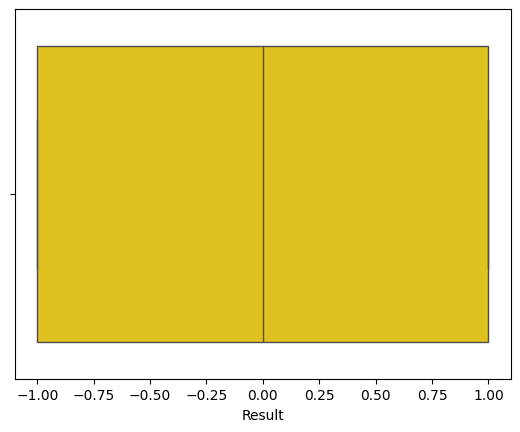

In [ ]:
sns.boxplot(data=df,x='Result',color='gold')

In [ ]:
df.reset_index(drop=True,inplace=True)
df

,HomeGoals,Home,AwayGoals,Away,Result,Month,Year
0,2,Wolverhampton Wanderers,0,Stoke City,1,5,2022
1,2,Bristol City,3,Coventry City,-1,5,2022
2,2,Sheffield United,1,Charlton Athletic,1,5,2022
3,3,Charlton Athletic,2,Barnsley,1,5,2022
4,1,Southampton U18,2,Manchester City U18,-1,5,2022
...,...,...,...,...,...,...,...
26031,2,Manchester Utd,1,Fulham,1,5,2023
26032,1,Everton,0,Bournemouth,1,5,2023
26033,2,Leicester City,1,West Ham,1,5,2023
26034,2,Aston Villa,1,Brighton,1,5,2023


Outliers Removed

Get Dummies For Team Names

In [ ]:
df1=pd.get_dummies(df[['Home', 'Away']],drop_first=True,dtype=int)
df1

,Home_1. FC Köln,Home_1. FC Nürnberg,Home_1. FC Union Berlin,Home_1. FSV Mainz 05,Home_ADO Den Haag,Home_AEK Athens,Home_AEK Larnaka,Home_AF Virois,Home_AFC Bournemouth,Home_AFC Wimbledon,...,Away_Wymondham Town Ladies,Away_Yeovil Town,Away_Yeovil Town Ladies,Away_Yeovil Town U18,Away_Yeovil Town U23,Away_York City,Away_Zamalek,Away_Zenit St Petersburg,Away_Zorya Luhansk,Away_sc Heerenveen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfe=pd.concat([df,df1],axis=1)

In [ ]:
dfe.drop(['Home', 'Away'],axis=1,inplace=True)
dfe

,HomeGoals,AwayGoals,Result,Month,Year,Home_1. FC Köln,Home_1. FC Nürnberg,Home_1. FC Union Berlin,Home_1. FSV Mainz 05,Home_ADO Den Haag,...,Away_Wymondham Town Ladies,Away_Yeovil Town,Away_Yeovil Town Ladies,Away_Yeovil Town U18,Away_Yeovil Town U23,Away_York City,Away_Zamalek,Away_Zenit St Petersburg,Away_Zorya Luhansk,Away_sc Heerenveen
0,2,0,1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,-1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,-1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031,2,1,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26032,1,0,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26033,2,1,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26034,2,1,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dfe.dtypes

HomeGoals                   int64
AwayGoals                   int64
Result                      int64
Month                       int32
Year                        int32
                            ...  
Away_York City              int64
Away_Zamalek                int64
Away_Zenit St Petersburg    int64
Away_Zorya Luhansk          int64
Away_sc Heerenveen          int64
Length: 1273, dtype: object

Predicting the Number of Goals scored by the home team


In [ ]:
x1=dfe.drop(['HomeGoals', 'Result'],axis=1)
x=x1.values
y1=dfe['HomeGoals']
y=y1.values
x

array([[   0,    5, 2022, ...,    0,    0,    0],
       [   3,    5, 2022, ...,    0,    0,    0],
       [   1,    5, 2022, ...,    0,    0,    0],
       ...,
       [   1,    5, 2023, ...,    0,    0,    0],
       [   1,    5, 2023, ...,    0,    0,    0],
       [   0,    5, 2023, ...,    0,    0,    0]])

In [ ]:
y

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
x_train

array([[   0,   11, 2021, ...,    0,    0,    0],
       [   1,   11, 2017, ...,    0,    0,    0],
       [   0,    4, 2019, ...,    0,    0,    0],
       ...,
       [   1,   11, 2018, ...,    0,    0,    0],
       [   0,    8, 2018, ...,    0,    0,    0],
       [   2,   10, 2020, ...,    0,    0,    0]])

In [ ]:
y_train

array([2, 2, 2, ..., 2, 2, 1])

In [ ]:
x_test

array([[   1,    9, 2021, ...,    0,    0,    0],
       [   2,    1, 2015, ...,    0,    0,    0],
       [   1,   10, 2019, ...,    0,    0,    0],
       ...,
       [   1,    2, 2021, ...,    0,    0,    0],
       [   3,    1, 2018, ...,    0,    0,    0],
       [   2,   12, 2017, ...,    0,    0,    0]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[0.        , 0.90909091, 0.77777778, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.90909091, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.27272727, 0.55555556, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.33333333, 0.90909091, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.63636364, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.81818182, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

Random Forest had the most accuracy when compared to the other Classifiers

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier()
# model1=RandomForestClassifier()
# params={'criterion':['gini', 'entropy', 'log_loss'], 'max_features':['sqrt', 'log2']}
# clf=GridSearchCV(model1,params,cv=2,scoring='accuracy')
# clf.fit(x_train,y_train)

In [ ]:
# print(clf.best_params_)

Best parameters are criterion='entropy' and max_features='sqrt'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='entropy', max_features='sqrt')
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([2, 2, 1, ..., 2, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion Matrix :')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score = ',accuracy_score(y_test,y_pred))
print('Classification Report :')
print(classification_report(y_test,y_pred))

Confusion Matrix :
[[1377  323  125   38]
 [ 184 2124  189   50]
 [ 155  341 1605   54]
 [  60  208  159  819]]
Accuracy Score =  0.7585456407630266
Classification Report :
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1863
           1       0.71      0.83      0.77      2547
           2       0.77      0.74      0.76      2155
           3       0.85      0.66      0.74      1246

    accuracy                           0.76      7811
   macro avg       0.78      0.74      0.76      7811
weighted avg       0.77      0.76      0.76      7811



Predicting the Number of Goals scored by the away team

In [ ]:
dfe

,HomeGoals,AwayGoals,Result,Month,Year,Home_1. FC Köln,Home_1. FC Nürnberg,Home_1. FC Union Berlin,Home_1. FSV Mainz 05,Home_ADO Den Haag,...,Away_Wymondham Town Ladies,Away_Yeovil Town,Away_Yeovil Town Ladies,Away_Yeovil Town U18,Away_Yeovil Town U23,Away_York City,Away_Zamalek,Away_Zenit St Petersburg,Away_Zorya Luhansk,Away_sc Heerenveen
0,2,0,1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,-1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,-1,5,2022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031,2,1,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26032,1,0,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26033,2,1,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26034,2,1,1,5,2023,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x1=dfe.drop(['AwayGoals', 'Result'],axis=1)
y1=dfe['AwayGoals']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=0)
x_train

,HomeGoals,Month,Year,Home_1. FC Köln,Home_1. FC Nürnberg,Home_1. FC Union Berlin,Home_1. FSV Mainz 05,Home_ADO Den Haag,Home_AEK Athens,Home_AEK Larnaka,...,Away_Wymondham Town Ladies,Away_Yeovil Town,Away_Yeovil Town Ladies,Away_Yeovil Town U18,Away_Yeovil Town U23,Away_York City,Away_Zamalek,Away_Zenit St Petersburg,Away_Zorya Luhansk,Away_sc Heerenveen
600,2,11,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17044,2,11,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9116,2,4,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25072,1,10,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21039,2,1,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1,11,2021,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19648,0,11,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,2,11,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10799,2,8,2018,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler1=MinMaxScaler()
scaler1.fit(x_train)
x_train=scaler1.transform(x_train)
x_test=scaler1.transform(x_test)
x_train

array([[0.66666667, 0.90909091, 0.77777778, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.90909091, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.27272727, 0.55555556, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.90909091, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.63636364, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.81818182, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(criterion='entropy', max_features='sqrt')
model2.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_pred1=model2.predict(x_test)
y_pred1

array([0, 0, 1, ..., 1, 3, 2])

In [ ]:
print('Confusion Matrix :')
print(confusion_matrix(y_test,y_pred1))
print('Accuracy Score = ',accuracy_score(y_test,y_pred1))
print('Classification Report :')
print(classification_report(y_test,y_pred1))

Confusion Matrix :
[[1771  407   98   21]
 [ 252 2256  171   43]
 [ 184  300 1320   42]
 [  80  146   48  672]]
Accuracy Score =  0.7705799513506594
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2297
           1       0.73      0.83      0.77      2722
           2       0.81      0.72      0.76      1846
           3       0.86      0.71      0.78       946

    accuracy                           0.77      7811
   macro avg       0.79      0.76      0.77      7811
weighted avg       0.78      0.77      0.77      7811



In [ ]:
import warnings
warnings.filterwarnings('ignore')

Prediction of input from User

In [ ]:
HomeTeam='Chelsea'
AwayTeam='Arsenal'
Month=9
Year=2020
away_team=df.loc[df['Away']==AwayTeam] [['AwayGoals']].values
away_team_goal=math.floor(np.average(away_team)) # Average number goals scored by the away team from DataFrame
away_team_goal

1

In [ ]:
# Input DataFrame Creation
Home_Team='Home_'+HomeTeam
Away_Team='Away_'+AwayTeam
AwayGoals=away_team_goal
df_input=pd.DataFrame({'AwayGoals':[AwayGoals], Home_Team:[1], Away_Team:[1], 'Month':Month, 'Year':Year}) # Dataset for HomeGoal Prediction
df_input

,AwayGoals,Home_Chelsea,Away_Arsenal,Month,Year
0,1,1,1,9,2020


In [ ]:
# Adding the missing features into Input DataFrame
df_example=x1.head(1)
missing_cols=set(x1.columns)-set(df_input.columns)
for i in missing_cols:
  df_input[i]=0
df_input=df_input[x1.columns].values # Ordering the input data
df_input # Input Data after converting to Prediction model

array([[   0,    9, 2020, ...,    0,    0,    0]])

In [ ]:
#Normalisation
df_input=scaler.transform(df_input)
df_input

array([[0.        , 0.72727273, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# Predicted number of goals scored by the Home Team
HomeGoals=model.predict(df_input)
HomeGoals

array([3])

In [ ]:
df_input_away=pd.DataFrame({'HomeGoals':HomeGoals, Home_Team:[1], Away_Team:[1]}) # Dataframe for AwayGoal Prediction
missing_cols=set(x1.columns)-set(df_input_away.columns)
for i in missing_cols:
  df_input_away[i]=0
df_input_away=df_input_away[x1.columns].values # Ordering the input data
df_input_away # Input Data after converting to Prediction model

array([[3, 0, 0, ..., 0, 0, 0]])

In [ ]:
#Normalisation
df_input_away=scaler1.transform(df_input_away)
df_input_away

array([[ 1.00000000e+00, -9.09090909e-02, -2.23777778e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
#Predicted number of goals scored by the away team
AwayGoals=model2.predict(df_input_away)
AwayGoals

array([1])

In [ ]:
if HomeGoals>AwayGoals:
  Result='H'
  print(HomeTeam, 'defeats', AwayTeam)
elif HomeGoals<AwayGoals:
  Result='A'
  print(AwayTeam, 'defeats', HomeTeam)
else:
  Result='D'
  print('Match is a draw')
print('Scoreline : ',HomeGoals,':',AwayGoals)

Chelsea defeats Arsenal
Scoreline :  [3] : [1]


Actual Prediction

In [ ]:
import ipywidgets as widgets
from IPython.display import display

Home_Team = widgets.Dropdown(options=prem_team_list, description='Home Team : ')
Away_Team = widgets.Dropdown(options=prem_team_list, description='Away Team : ')
Year_ = widgets.IntSlider(value=2013, min=2013, max=2024, description='Year :')
Month_ = widgets.IntSlider(value=1, min=1, max=12, description='Month :')
button = widgets.Button(description='Submit', button_style='success')


display(Home_Team)
display(Away_Team)
display(Year_)
display(Month_)
display(button)


def predict_func(Home_Team,Away_Team,Month_,Year_):
  HomeTeam=Home_Team
  AwayTeam=Away_Team
  Month=Month_
  Year=Year_
  away_team=df.loc[df['Away']==AwayTeam] [['AwayGoals']].values
  away_team_goal=math.floor(np.average(away_team)) # Average number goals scored by the away team from DataFrame


  # Input DataFrame Creation
  Home_Team='Home_'+HomeTeam
  Away_Team='Away_'+AwayTeam
  AwayGoals=away_team_goal
  df_input=pd.DataFrame({'AwayGoals':[AwayGoals], Home_Team:[1], Away_Team:[1], 'Month':Month, 'Year':Year}) # Dataset for HomeGoal Prediction


  # Adding the missing features into Input DataFrame
  # df_example=x1.head(1)
  missing_cols=set(x1.columns)-set(df_input.columns)
  for i in missing_cols:
    df_input[i]=0
  df_input=df_input[x1.columns].values # Ordering the input data


  #Normalisation
  df_input=scaler.transform(df_input)


  # Predicted number of goals scored by the Home Team
  HomeGoals=model.predict(df_input)


  df_input_away=pd.DataFrame({'HomeGoals':HomeGoals, Home_Team:[1], Away_Team:[1]}) # Dataframe for AwayGoal Prediction
  missing_cols=set(x1.columns)-set(df_input_away.columns)
  for i in missing_cols:
    df_input_away[i]=0
  df_input_away=df_input_away[x1.columns].values # Ordering the input data


  #Normalisation
  df_input_away=scaler1.transform(df_input_away)


  #Predicted number of goals scored by the away team
  AwayGoals=model2.predict(df_input_away)


  print('*'*200)
  if HomeGoals>AwayGoals:
    Result='H'
    print(HomeTeam, 'defeats', AwayTeam)
  elif HomeGoals<AwayGoals:
    Result='A'
    print(AwayTeam, 'defeats', HomeTeam)
  else:
    Result='D'
    print('Match is a draw')
  print('Scoreline : ', HomeTeam, HomeGoals,':', AwayGoals, AwayTeam)



button.on_click(lambda button: predict_func(Home_Team.value, Away_Team.value, Month_.value, Year_.value))

Dropdown(description='Home Team : ', options=('Arsenal', 'Aston Villa', 'Barnsley', 'Birmingham City', 'Blackb…

Dropdown(description='Away Team : ', options=('Arsenal', 'Aston Villa', 'Barnsley', 'Birmingham City', 'Blackb…

IntSlider(value=2013, description='Year :', max=2024, min=2013)

IntSlider(value=1, description='Month :', max=12, min=1)

Button(button_style='success', description='Submit', style=ButtonStyle())

********************************************************************************************************************************************************************************************************
Tottenham defeats Arsenal
Scoreline :  Tottenham [2] : [1] Arsenal
